##### Per futurs exercicis, generem una nova base de dades combinant els atributs tant de guanyadores com de perdedores i afegint una columna on s'especifica si la jugadora ha guanyat o perdut.
Aquesta base de dades pot servir per estudiar millor si hi ha algun(s) atribut(s) que ajudin a guanyar partits.

In [1]:
import pandas as pd
import pycountry
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('atp2017.csv', index_col=False, warn_bad_lines=True, error_bad_lines=False)
df.columns

Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry',
       'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age',
       'winner_rank', 'winner_rank_points', 'loser_id', 'loser_seed',
       'loser_entry', 'loser_name', 'loser_hand', 'loser_ht', 'loser_ioc',
       'loser_age', 'loser_rank', 'loser_rank_points', 'score', 'best_of',
       'round', 'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon',
       'w_2ndWon', 'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df',
       'l_svpt', 'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved',
       'l_bpFaced'],
      dtype='object')

In [3]:
df.columns

Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry',
       'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age',
       'winner_rank', 'winner_rank_points', 'loser_id', 'loser_seed',
       'loser_entry', 'loser_name', 'loser_hand', 'loser_ht', 'loser_ioc',
       'loser_age', 'loser_rank', 'loser_rank_points', 'score', 'best_of',
       'round', 'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon',
       'w_2ndWon', 'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df',
       'l_svpt', 'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved',
       'l_bpFaced'],
      dtype='object')

In [4]:
dfwin=df[['winner_hand', 'winner_ht', 'winner_age',
          'winner_rank','round','minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon',
          'w_2ndWon', 'w_SvGms', 'w_bpSaved', 'w_bpFaced']]

In [5]:
dfwin['result']='win'
dfwin.head()

<ipython-input-5-de5c495d6a84>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfwin['result']='win'


,winner_hand,winner_ht,winner_age,winner_rank,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,result
0,R,188.0,25.634497,17.0,F,108.0,7.0,2.0,77.0,52.0,41.0,12.0,13.0,5.0,7.0,win
1,R,188.0,25.634497,17.0,SF,87.0,4.0,1.0,58.0,36.0,27.0,18.0,10.0,0.0,0.0,win
2,R,178.0,27.011636,5.0,SF,101.0,1.0,1.0,77.0,56.0,37.0,14.0,11.0,4.0,5.0,win
3,R,196.0,26.017796,3.0,QF,140.0,23.0,3.0,97.0,62.0,50.0,16.0,15.0,6.0,7.0,win
4,R,188.0,25.634497,17.0,QF,124.0,3.0,3.0,94.0,52.0,42.0,23.0,14.0,13.0,14.0,win


In [6]:
dfloss=df[['loser_hand', 'loser_ht', 'loser_age',
          'loser_rank','round','minutes', 'l_ace', 'l_df', 'l_svpt', 'l_1stIn', 'l_1stWon',
          'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced']]

In [7]:
dfloss['result']='loss'
dfloss.head()

<ipython-input-7-5419affa8c67>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfloss['result']='loss'


,loser_hand,loser_ht,loser_age,loser_rank,round,minutes,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,result
0,R,178.0,27.011636,5.0,F,108.0,4.0,0.0,69.0,49.0,36.0,9.0,12.0,2.0,5.0,loss
1,R,196.0,26.017796,3.0,SF,87.0,4.0,3.0,61.0,28.0,24.0,16.0,10.0,2.0,4.0,loss
2,R,183.0,31.767283,4.0,SF,101.0,9.0,2.0,61.0,37.0,27.0,10.0,10.0,0.0,2.0,loss
3,L,185.0,30.584531,9.0,QF,140.0,4.0,0.0,84.0,61.0,39.0,14.0,14.0,2.0,4.0,loss
4,R,NaN,23.331964,8.0,QF,124.0,6.0,5.0,82.0,37.0,29.0,24.0,14.0,4.0,7.0,loss


In [8]:
dfwin.columns = ['hand', 'height', 'age',
          'rank','round','minutes', 'ace', 'df', 'svpt', '1stIn', '1stWon',
          '2ndWon', 'SvGms', 'bpSaved', 'bpFaced','result']
dfloss.columns = ['hand', 'height', 'age',
          'rank','round','minutes', 'ace', 'df', 'svpt', '1stIn', '1stWon',
          '2ndWon', 'SvGms', 'bpSaved', 'bpFaced','result']

In [9]:
print(dfwin.info())
print(dfloss.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   hand     386 non-null    object 
 1   height   250 non-null    float64
 2   age      388 non-null    float64
 3   rank     375 non-null    float64
 4   round    388 non-null    object 
 5   minutes  374 non-null    float64
 6   ace      374 non-null    float64
 7   df       374 non-null    float64
 8   svpt     374 non-null    float64
 9   1stIn    374 non-null    float64
 10  1stWon   374 non-null    float64
 11  2ndWon   374 non-null    float64
 12  SvGms    374 non-null    float64
 13  bpSaved  374 non-null    float64
 14  bpFaced  374 non-null    float64
 15  result   388 non-null    object 
dtypes: float64(13), object(3)
memory usage: 48.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ----

In [10]:
frames = [dfwin, dfloss]
dfjoin = pd.concat(frames)
dfjoin.head()

,hand,height,age,rank,round,minutes,ace,df,svpt,1stIn,1stWon,2ndWon,SvGms,bpSaved,bpFaced,result
0,R,188.0,25.634497,17.0,F,108.0,7.0,2.0,77.0,52.0,41.0,12.0,13.0,5.0,7.0,win
1,R,188.0,25.634497,17.0,SF,87.0,4.0,1.0,58.0,36.0,27.0,18.0,10.0,0.0,0.0,win
2,R,178.0,27.011636,5.0,SF,101.0,1.0,1.0,77.0,56.0,37.0,14.0,11.0,4.0,5.0,win
3,R,196.0,26.017796,3.0,QF,140.0,23.0,3.0,97.0,62.0,50.0,16.0,15.0,6.0,7.0,win
4,R,188.0,25.634497,17.0,QF,124.0,3.0,3.0,94.0,52.0,42.0,23.0,14.0,13.0,14.0,win


In [11]:
dfjoin=dfjoin.dropna(subset = ["rank"])
dfjoin=dfjoin.dropna(subset = ["hand"])
dfjoin=dfjoin.fillna(dfjoin.mean().astype(int))
dfjoin['age']=round(dfjoin['age']).astype(int)
dfjoin['minutes']=round(dfjoin['minutes']).astype(int)

In [12]:
dfjoin.isnull().sum()

hand       0
height     0
age        0
rank       0
round      0
minutes    0
ace        0
df         0
svpt       0
1stIn      0
1stWon     0
2ndWon     0
SvGms      0
bpSaved    0
bpFaced    0
result     0
dtype: int64

In [13]:
dfjoin.head()

,hand,height,age,rank,round,minutes,ace,df,svpt,1stIn,1stWon,2ndWon,SvGms,bpSaved,bpFaced,result
0,R,188.0,26,17.0,F,108,7.0,2.0,77.0,52.0,41.0,12.0,13.0,5.0,7.0,win
1,R,188.0,26,17.0,SF,87,4.0,1.0,58.0,36.0,27.0,18.0,10.0,0.0,0.0,win
2,R,178.0,27,5.0,SF,101,1.0,1.0,77.0,56.0,37.0,14.0,11.0,4.0,5.0,win
3,R,196.0,26,3.0,QF,140,23.0,3.0,97.0,62.0,50.0,16.0,15.0,6.0,7.0,win
4,R,188.0,26,17.0,QF,124,3.0,3.0,94.0,52.0,42.0,23.0,14.0,13.0,14.0,win


In [14]:
dfjoin = pd.get_dummies(dfjoin, prefix='hand' , prefix_sep='_', columns=['hand'])

In [15]:
dfjoin.loc[dfjoin.hand_U == 1, "hand_L"] = 1
dfjoin.loc[dfjoin.hand_U == 1, "hand_R"] = 1
dfjoin=dfjoin.drop(['hand_U'], axis=1)

In [16]:
dfjoin.head()

,height,age,rank,round,minutes,ace,df,svpt,1stIn,1stWon,2ndWon,SvGms,bpSaved,bpFaced,result,hand_L,hand_R
0,188.0,26,17.0,F,108,7.0,2.0,77.0,52.0,41.0,12.0,13.0,5.0,7.0,win,0,1
1,188.0,26,17.0,SF,87,4.0,1.0,58.0,36.0,27.0,18.0,10.0,0.0,0.0,win,0,1
2,178.0,27,5.0,SF,101,1.0,1.0,77.0,56.0,37.0,14.0,11.0,4.0,5.0,win,0,1
3,196.0,26,3.0,QF,140,23.0,3.0,97.0,62.0,50.0,16.0,15.0,6.0,7.0,win,0,1
4,188.0,26,17.0,QF,124,3.0,3.0,94.0,52.0,42.0,23.0,14.0,13.0,14.0,win,0,1


In [17]:
#funció per moure columnes:
def colmove(position,colname):
    temp = dfjoin.pop(colname)
    dfjoin.insert(position, colname, temp )
    
colmove(3,'hand_R')
colmove(4,'hand_L')

In [18]:
dfjoin['result'].value_counts()

win     375
loss    365
Name: result, dtype: int64

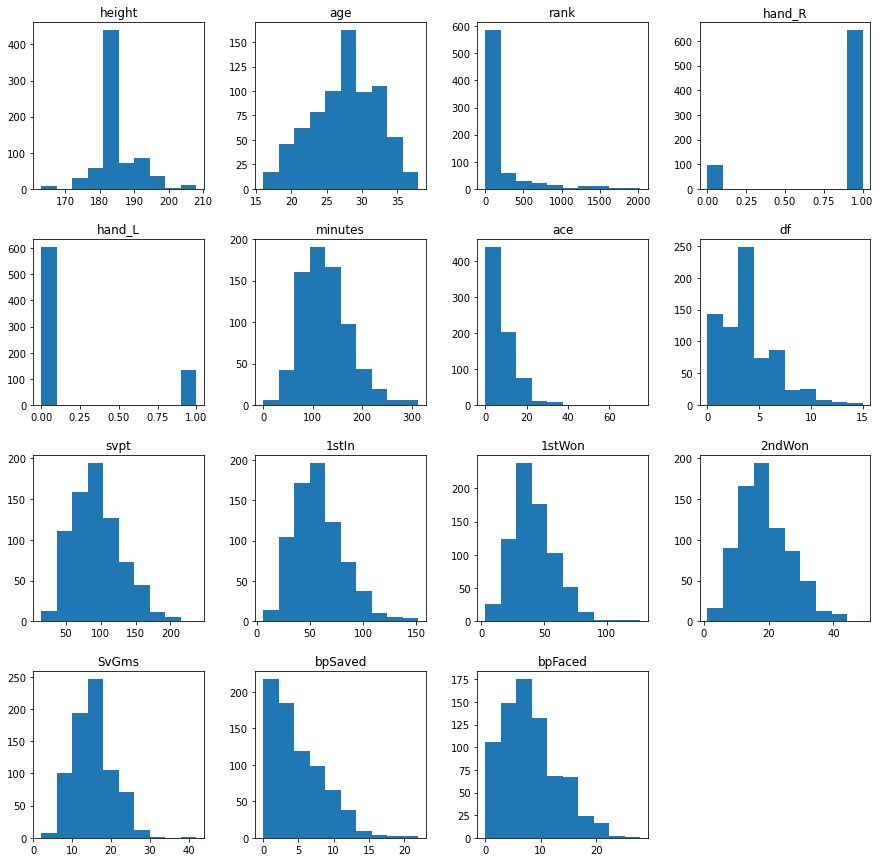

In [19]:
dfjoin1 = dfjoin.hist(figsize = (15,15),grid=False)

In [20]:
dfjoin.to_csv('winloss.csv')